In [2]:
import numpy as  np
import keras

Using TensorFlow backend.


In [3]:
model = keras.models.load_model('./keras-cifar-10-trained-model3.h5')

### 数据

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

X_train = (X_train/255).astype(np.float32)
X_test = (X_test/255).astype(np.float32)
X_train.shape

(50000, 32, 32, 3)

In [6]:
model.fit(X_train,y_train,batch_size = 32,validation_data=(X_test,y_test),workers=4)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 172s 3ms/step - loss: 0.5749 - accuracy: 0.7975 - val_loss: 0.6547 - val_accuracy: 0.7784


### 从网络上拿到图片，使用模型识别

In [9]:
# 训练的图片尺寸32*32*3
# 网络获取的图片，尺寸，可大可小，图片尺寸需要一致化
# opencv
import cv2
import matplotlib.pyplot as plt

array([8], dtype=int64)

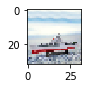

In [34]:
deer = cv2.imread('./ship.jpg')
# opencv加载图片颜色通道是：蓝绿红 -----> 红绿蓝 
deer = cv2.resize(deer,dsize = (32,32))[:,:,::-1]
plt.figure(figsize=(1,1))
plt.imshow(deer)
deer = (deer/255).astype(np.float32).reshape(1,32,32,3)
model.predict_classes(deer)

In [20]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

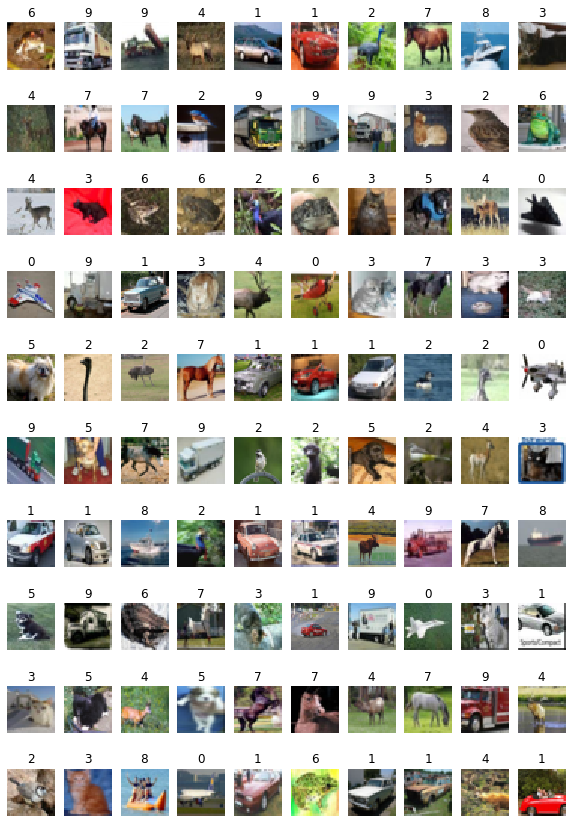

In [24]:
plt.figure(figsize=(10,15))
for i in range(100):
    ax = plt.subplot(10,10,i+1)
    ax.imshow(X_train[i])
    ax.axis('off')
    ax.set_title(y_train[i,0])